In [46]:
#command to save the changes to the file in every 15 sec
%autosave 15

Autosaving every 15 seconds


In [47]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [48]:
# Reading data
url = "http://bit.ly/w-data"
data_input = pd.read_csv(url)
print("Data imported successfully")

data_input.head(25)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


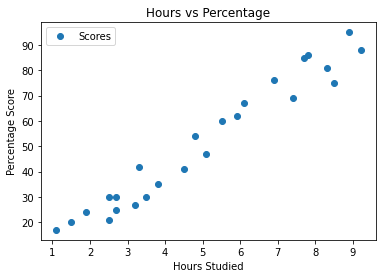

In [49]:
# Plotting the distribution of scores
data_input.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [50]:
X = data_input.iloc[:, :-1].values  
y = data_input.iloc[:, 1].values  

In [51]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=1) 

### **Training the Algorithm**


In [52]:
#
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


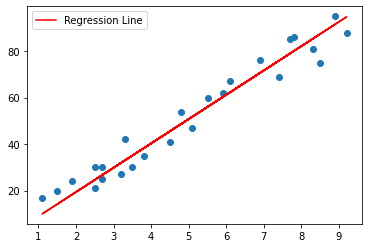

In [53]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color='red', label='Regression Line')
plt.legend()
plt.show()

In [54]:
#Prediction
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]]


In [55]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


In [56]:
# You can also test with your own data
hours = 9.25
hour  =np.array(hours).reshape(-1,1)
own_pred = regressor.predict(hour)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 95.22829438402952


In [57]:
#evaluate the performance of algorithm
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 7.882398086270432
